<a href="https://colab.research.google.com/github/RicardColomOrero/easymoney/blob/eva/Easymoney_Ricard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENUNCIADO CAPSTONE- Eva

 
## 1.- PowerBI (Opcional)
Hemos decidido reorientar nuestra estrategia comercial hacia el
**aumento de la penetración de la cartera actual de productos en nuestro mercado**, con la idea de obtener una
mejor rentabilidad de nuestra base actual de clientes (lo del cuadrante barato de la matriz de Ansoff). 

A cambio, reduciremos la actividad intensiva de captación que veníamos realizando desde que arrancamos. En este sentido, y para acabar de definir la estrategia, estaría genial poder tener algunos análisis que nos ayuden
a tomar decisiones. Como te decía, ahora tenemos un autoservicio, pero esta foto simple no nos ayuda demasiado. 
Si ni siquiera sé cuantos productos hemos vendido este mes o si son los clientes nuevos quiénes contratan o los que ya teníamos!

Sería genial incluso que pudieses utilizar el reciente producto adquirido
PowerBI para **preparar unos KPI’s de lo que tenemos en la empresa**

## 2.- Propensión (modelo de propensión a compra)

Una vez que hayamos hecho el **análisis de nuestra BBDD nos gustaría poder vender más y mejor nuestros productos**, sé que los data scientist tienen una “bola de cristal” y saben qué clientes son más propensos a
comprar nuestros productos así que te pido por favor hagas un **modelo de propensión a compra**, se que tenemos muchos productos, así que te **,dejo a tu criterio científico qué productos elegir, o pueden ser varios,**, ya
me sorprenderás

## 3.- Segmentación

Una vez obtenido la propensión de los productos sería genial poder conocer mejor a nuestros clientes para orientar nuestra actividad comercial. Hace tiempo vengo teniendo la idea de que podríamos **segmentar la base
de clientes en 7 u 8 grupos de clientes similares**... sería genial** identificarlos, y poder saber cómo son los clientes
que pertenecen a estos grupos**... nos ayudaría muchísimo a la hora de definir todo nuestro plan de marketing de cara a futuro!

## 4.- Caso de uso

Perfecto! Tenemos las segmentaciones de clientes, tenemos las propensiones y ahora lo que nos falta es realizar
**un caso de uso que nos permita estimar en base a una campaña X cuánto dinero podemos ganar**, 

¿A cuántos clientes tenemos que impactar?

¿Qué productos ofrecer?
 
¿Impactamos a todos lo segmentos indicados?


# Importación de librerías

In [1]:
import sys
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

from google.colab import files
from google.colab import drive


from sklearn import model_selection
import xgboost as xgb

from scipy import stats
from datetime import datetime

import random
import json
from pandas import json_normalize

# Importación dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_dir = '/content/drive/MyDrive/TFM  Data Science/datasets_TFM_y_diccionario/'

In [ ]:
file_sales ="sales.csv"
file_product_description ="product_description.csv"
file_customer_sociodemographics ="customer_sociodemographics.csv"
file_customer_commercial_activity = "customer_commercial_activity.csv"
file_customer_products ="customer_products.csv"


file_diccionario_tablas ="diccionario_tablas.xlsx"

In [4]:
file_customer_commercial_activity = "customer_commercial_activity.csv"

In [ ]:
sales_raw = pd.read_csv(file_dir + file_sales)
product_description_raw = pd.read_csv(file_dir +file_product_description)
customer_sociodemographics_raw = pd.read_csv(file_dir + file_customer_sociodemographics)
customer_commercial_activity_raw = pd.read_csv(file_dir + file_customer_commercial_activity)
customer_products_raw = pd.read_csv(file_dir + file_customer_products)

diccionario_tablas_raw = pd.read_excel(file_dir + file_diccionario_tablas)

In [5]:
customer_commercial_activity_raw = pd.read_csv(file_dir + file_customer_commercial_activity)

# 2.- DATA UNDERSTANDING

## 2.1.- Análisis univariante de datos

### Sales

* pk_sale: Identificador de venta - (primary key)
* cid: Identificador de cliente - (foreing key)
* month_sale: Mes de venta. Mes en el que se contrata un producto.
* product_ID: Identificador de producto  - (foreing key)
* net_margin: Margen neto generado por la venta ($)

In [ ]:
sales_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  240773 non-null  int64  
 1   pk_sale     240773 non-null  int64  
 2   cid         240773 non-null  int64  
 3   month_sale  240773 non-null  object 
 4   product_ID  240773 non-null  int64  
 5   net_margin  240773 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 11.0+ MB


In [ ]:
sales_raw.head

<bound method NDFrame.head of         Unnamed: 0  pk_sale      cid  month_sale  product_ID  net_margin
0                0     6666    33620  2018-05-01        2335       952.9
1                1     6667    35063  2018-06-01        2335      1625.2
2                2     6668    37299  2018-02-01        2335      1279.7
3                3     6669    39997  2018-02-01        2335      1511.9
4                4     6670    44012  2018-02-01        2335      1680.3
...            ...      ...      ...         ...         ...         ...
240768      240768   247434  1553456  2019-05-01        4657        56.7
240769      240769   247435  1553541  2019-05-01        4657        66.5
240770      240770   247436  1553559  2019-05-01        4657        73.0
240771      240771   247437  1553565  2019-05-01        4657        82.3
240772      240772   247438  1553571  2019-05-01        4657        84.4

[240773 rows x 6 columns]>

In [ ]:
sales_raw.describe(include = ['object'])

,month_sale
count,240773
unique,16
top,2018-10-01
freq,27693


In [ ]:
sales_raw.describe(exclude = ['object'])

,Unnamed: 0,pk_sale,cid,product_ID,net_margin
count,240773.000000,240773.000000,2.407730e+05,240773.000000,240773.000000
mean,120386.000000,127052.000000,1.363934e+06,3945.408202,606.878164
std,69505.322519,69505.322519,1.751721e+05,1632.821700,1735.806089
min,0.000000,6666.000000,1.589100e+04,1119.000000,25.000000
25%,60193.000000,66859.000000,1.301012e+06,2312.000000,61.400000
50%,120386.000000,127052.000000,1.409253e+06,4657.000000,69.100000
75%,180579.000000,187245.000000,1.475320e+06,4657.000000,79.200000
max,240772.000000,247438.000000,1.553571e+06,9001.000000,18466.400000


In [ ]:
sales_raw.isnull().sum()

Unnamed: 0    0
pk_sale       0
cid           0
month_sale    0
product_ID    0
net_margin    0
dtype: int64

In [ ]:
# ACCIONES SALES

# Eliminar columna "Unnamed"
# Cambiar tipo de month_sale a fecha
# Disgregar la fecha en mes, año, día, día de la semana (otros: trimestre, fin de semana, festivo...)
# Cambiar los identificadores (pk_sale, cid, product_ID) a variable categórica
# Establecer primary key como index? Culebra: Diría que sí


#Renombrar columnas para alinear el naming, por ejemplo variable cid como "client_ID", pk_sale como "sale_ID"

### Product Description

* pk_product_ID	= Identificador de producto - (primary key)
* product_desc	= Descripción del producto
* family_product	= Vertical del producto. Grupo al que pertenece.

In [ ]:
product_description_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      13 non-null     int64 
 1   pk_product_ID   13 non-null     int64 
 2   product_desc    13 non-null     object
 3   family_product  13 non-null     object
dtypes: int64(2), object(2)
memory usage: 544.0+ bytes


In [ ]:
product_description_raw.head()

,Unnamed: 0,pk_product_ID,product_desc,family_product
0,0,4657,em_acount,account
1,1,3819,debit_card,payment_card
2,2,1364,pension_plan,pension_plan
3,3,2234,payroll,account
4,4,2235,payroll_account,account


In [ ]:
product_description_raw.describe(include = ['object'])

,product_desc,family_product
count,13,13
unique,13,5
top,em_acount,account
freq,1,4


In [ ]:
product_description_raw.describe(exclude = ['object'])

,Unnamed: 0,pk_product_ID
count,13.00000,13.000000
mean,6.00000,3614.538462
std,3.89444,2564.251438
min,0.00000,1119.000000
25%,3.00000,2235.000000
50%,6.00000,2336.000000
75%,9.00000,4033.000000
max,12.00000,9001.000000


In [ ]:
product_description_raw.isnull().sum()

Unnamed: 0        0
pk_product_ID     0
product_desc      0
family_product    0
dtype: int64

In [ ]:
# ACCIONES PRODUCT DESCRIPTION

# Eliminar columna Unnamed
# Cambiar los identificadores (pk_product_ID) a variable categórica
# Establecer primary key como index?


### Customer Sociodemographics

* pk_cid =	Identificador de cliente
* pk_partition =	Identificador de Partición. Mensualmente se ingesta en la tabla una partición con el estado de la base de clientes.
* deceased =	Indicador de fallecimiento
* gender =	Sexo del cliente
* region_code =	Provincia de residencia del cliente (para ES)
* salary =	Ingresos brutos de la unidad familiar
* country_id =	País de residencia del cliente
* age =	Edad del cliente

In [ ]:
customer_sociodemographics_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   pk_cid        int64  
 2   pk_partition  object 
 3   country_id    object 
 4   region_code   float64
 5   gender        object 
 6   age           int64  
 7   deceased      object 
 8   salary        float64
dtypes: float64(2), int64(3), object(4)
memory usage: 409.4+ MB


In [ ]:
customer_sociodemographics_raw.head()

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01,ES,29.0,H,35,N,87218.10
1,1,1050611,2018-01,ES,13.0,V,23,N,35548.74
2,2,1050612,2018-01,ES,13.0,V,23,N,122179.11
3,3,1050613,2018-01,ES,50.0,H,22,N,119775.54
4,4,1050614,2018-01,ES,50.0,V,23,N,NaN


In [ ]:
customer_sociodemographics_raw.describe(include = ['object'])

,pk_partition,country_id,gender,deceased
count,5962924,5962924,5962899,5962924
unique,17,41,2,2
top,2019-05,ES,H,N
freq,442995,5960672,3087502,5961849


In [ ]:
customer_sociodemographics_raw.describe(exclude = ['object'])

,Unnamed: 0,pk_cid,region_code,age,salary
count,5.962924e+06,5.962924e+06,5.960660e+06,5.962924e+06,4.421820e+06
mean,7.155425e+06,1.234930e+06,2.581440e+01,2.976042e+01,1.155833e+05
std,3.920784e+06,1.623020e+05,1.359566e+01,1.198038e+01,2.000066e+05
min,0.000000e+00,1.589100e+04,1.000000e+00,2.000000e+00,1.202730e+03
25%,4.240386e+06,1.112532e+06,1.300000e+01,2.200000e+01,6.141532e+04
50%,7.499346e+06,1.231097e+06,2.800000e+01,2.500000e+01,8.844147e+04
75%,1.020142e+07,1.352339e+06,3.600000e+01,3.400000e+01,1.313092e+05
max,1.364731e+07,1.553689e+06,5.200000e+01,1.050000e+02,2.889440e+07


In [ ]:
customer_sociodemographics_raw.isnull().sum()

Unnamed: 0            0
pk_cid                0
pk_partition          0
country_id            0
region_code        2264
gender               25
age                   0
deceased              0
salary          1541104
dtype: int64

In [ ]:
customer_sociodemographics_raw["country_id"].value_counts().head(10)

ES    5960672
GB        441
FR        225
DE        199
US        195
CH        194
BR         87
BE         81
VE         79
IE         68
Name: country_id, dtype: int64

In [ ]:
# ACCIONES CUSTOMER SOCIODEMOGRAPHICS

# Eliminar columna Unnamed
# Cambiar los identificadores (pk_cid,region_code) a variable categórica
# Establecer primary key como index?
# Gestionar nulos: (Culebra: tenemos modelo de clasificación así que lo que haremos será ponerles valores extremos)
#     region_code
#     gender
#     salary
# gender > Transformar a boolean
# deceased > Transformar a boolean
# country_id > ¿OneHotEncoding? Culebra: Posiblemente transformar a boolean "ES" Sí/No
# partition aporta algo? Culebra: Misma pregunta, no entiendo muy bien esa variable ahora mismo

### Customer Commercial Activity

* pk_cid = Identificador de cliente
* pk_partition =	Identificador de Partición. Mensualmente se ingesta en la tabla una partición con el estado de la base de clientes.
* entry_channel =	Canal de captación del cliente
* entry_date =	Fecha en la que realizó la primera contratación a través de easyMoney
* segment =	Segmento comercial del cliente
* active_customer =	Indicador de actividad del cliente en la app EasyMoney

In [ ]:
customer_commercial_activity_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   pk_cid           int64  
 2   pk_partition     object 
 3   entry_date       object 
 4   entry_channel    object 
 5   active_customer  float64
 6   segment          object 
dtypes: float64(1), int64(2), object(4)
memory usage: 318.5+ MB


In [ ]:
customer_commercial_activity_raw.head()

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,0,1375586,2018-01,2018-01,KHL,1.0,02 - PARTICULARES
1,1,1050611,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
2,2,1050612,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
3,3,1050613,2018-01,2015-08,KHD,0.0,03 - UNIVERSITARIO
4,4,1050614,2018-01,2015-08,KHE,1.0,03 - UNIVERSITARIO


In [ ]:
customer_commercial_activity_raw.describe(include = ['object']).T

,count,unique,top,freq
pk_partition,5962924,17,2019-05,442995
entry_date,5962924,53,2016-10,382473
entry_channel,5829891,68,KHE,3113947
segment,5828980,3,03 - UNIVERSITARIO,3900166


In [ ]:
customer_commercial_activity_raw.describe(exclude = ['object']).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5962924.0,7.155425e+06,3.920784e+06,0.0,4240385.75,7499346.5,10201422.25,13647308.0
pk_cid,5962924.0,1.234930e+06,1.623020e+05,15891.0,1112532.00,1231097.0,1352339.00,1553689.0
active_customer,5962924.0,4.033845e-01,4.905767e-01,0.0,0.00,0.0,1.00,1.0


In [6]:
customer_commercial_activity_raw.isnull().sum()

Unnamed: 0              0
pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [ ]:
# ACCIONES CUSTOMER COMMERCIAL ACTIVITY**


# Eliminar columna Unnamed. Hecho
# Cambiar nombres pk_cid, pk_partition. Hecho
# Cambiar los identificadores (pk_cid) a variable categórica. 
# Cambiar tipo de active_customer a int -Hecho
# Establecer primary key como index. Hecho
# Gestionar nulos: 
#     entry_channel  ( cambiado a 'ZZZ')    
#     segment   (cambiado a '04_No segment')         
# Cambiar tipo de entry_date a fecha- Hecho
# Disgregar entry_date en mes, año, día, día de la semana (otros: trimestre, fin de semana, festivo...)
# entry_channel > OneHotEncoding o FrecuencyEncoding. Hecho
# segment > OneHotEncoding. Hecho

#### Ajuste de tipos y nombres columnas

In [7]:
customer_commercial_activity_1=customer_commercial_activity_raw.copy()

In [8]:
customer_commercial_activity_1.drop('Unnamed: 0',axis=1,inplace=True)


In [9]:
customer_commercial_activity_1.rename({'pk_cid':'customer_ID','pk_partition':'partition_ID'},axis=1,inplace=True)

In [10]:
customer_commercial_activity_1['customer_ID']=customer_commercial_activity_1['customer_ID'].astype('object')

In [ ]:
#customer_commercial_activity_1.set_index('customer_ID',inplace=True)

In [ ]:
#customer_commercial_activity_1['active_customer']=customer_commercial_activity_1['active_customer'].astype(bool)

In [11]:
customer_commercial_activity_1['entry_date']=pd.to_datetime(customer_commercial_activity_1['entry_date'],format='%Y-%m')

In [12]:
customer_commercial_activity_1['partition_ID']=pd.to_datetime(customer_commercial_activity_1['partition_ID'],format='%Y-%m')

In [ ]:
customer_commercial_activity_1.head()

,customer_ID,partition_ID,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-01,2018-01-01,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01-01,2015-08-01,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-01,2015-08-01,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-01,2015-08-01,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-01,2015-08-01,KHE,1.0,03 - UNIVERSITARIO


#### Imputación de valores nulos (sustituir por valores exisitnetes en otras particiones)

In [36]:
customer_commercial_activity_1.isnull().sum()
                                      
                                      

customer_ID             0
partition_ID            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [37]:
df=customer_commercial_activity_1.copy()

In [16]:
df.head()

,customer_ID,partition_ID,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-01,2018-01-01,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01-01,2015-08-01,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-01,2015-08-01,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-01,2015-08-01,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-01,2015-08-01,KHE,1.0,03 - UNIVERSITARIO


##### Segment

In [38]:
ids_nullsegment_unique=df[(df['segment'].isnull()==True)]['customer_ID'].unique()
#array con los ids que tienen nulos

In [19]:
len(ids_nullsegment_unique)

133281

In [40]:
valores_nulos_segment=df[(df.customer_ID.isin(ids_nullsegment_unique))&(df['segment'].notnull())&(df['partition_ID']=='2019-05-01')][['customer_ID','segment']]

In [41]:
valores_nulos_segment

,customer_ID,segment
5519933,657336,02 - PARTICULARES
5519937,655774,02 - PARTICULARES
5519943,656215,02 - PARTICULARES
5519944,656613,02 - PARTICULARES
5519950,662794,02 - PARTICULARES
...,...,...
5960470,1164020,02 - PARTICULARES
5960617,1164053,02 - PARTICULARES
5961077,1164621,03 - UNIVERSITARIO
5961787,1168234,03 - UNIVERSITARIO


In [42]:
customer_ID_nulos_segment=valores_nulos_segment['customer_ID']

In [43]:
segment_nulos_segment=valores_nulos_segment['segment']

In [44]:
dict_nulos_segment=dict(zip(customer_ID_nulos_segment,segment_nulos_segment))

In [ ]:
df

##### Entry Channel

In [26]:
ids_nullentrychannel_unique=df[(df['entry_channel'].isnull()==True)]['customer_ID'].unique()
#array con los ids que tienen nulos

In [27]:
len(ids_nullentrychannel_unique)

132201

In [28]:
valores_nulos_entrychannel=df[(df.customer_ID.isin(ids_nullentrychannel_unique))&(df['entry_channel'].notnull())&(df['partition_ID']=='2019-05-01')][['customer_ID','entry_channel']]

In [29]:
valores_nulos_entrychannel

,customer_ID,entry_channel
5519937,655774,KHN
5519943,656215,KHN
5519950,662794,KHM
5519963,650354,KHM
5519978,648844,KFA
...,...,...
5958094,1173632,KHO
5958578,1172036,KHM
5958587,1172024,KHM
5960617,1164053,KHO


In [30]:
customer_ID_nulos_entrychannel=valores_nulos_entrychannel['customer_ID']
entrychannel_nulos_entrychannel=valores_nulos_entrychannel['entry_channel']
dict_nulos_entrychannel=dict(zip(customer_ID_nulos_entrychannel,entrychannel_nulos_entrychannel))

##### Imputación de nulos

In [59]:
df1=df.set_index('customer_ID')

In [60]:
df1.head()

,partition_ID,entry_date,entry_channel,active_customer,segment
customer_ID,,,,,
1375586,2018-01-01,2018-01-01,KHL,1.0,02 - PARTICULARES
1050611,2018-01-01,2015-08-01,KHE,0.0,03 - UNIVERSITARIO
1050612,2018-01-01,2015-08-01,KHE,0.0,03 - UNIVERSITARIO
1050613,2018-01-01,2015-08-01,KHD,0.0,03 - UNIVERSITARIO
1050614,2018-01-01,2015-08-01,KHE,1.0,03 - UNIVERSITARIO


In [61]:
df1['entry_channel'].fillna(dict_nulos_entrychannel,inplace=True)
df1['segment'].fillna(dict_nulos_segment,inplace=True)

In [62]:
df1.isnull().sum()

partition_ID           0
entry_date             0
entry_channel      13245
active_customer        0
segment            13347
dtype: int64

#### Imputación de nulos ( sustituir pro valores extremos)

In [63]:
df1.describe(include = ['number']).T

,count,mean,std,min,25%,50%,75%,max
active_customer,5962924.0,0.403384,0.490577,0.0,0.0,0.0,1.0,1.0


In [64]:
df1.describe(include = ['object']).T

,count,unique,top,freq
entry_channel,5949679,68,KHE,3113987
segment,5949577,3,03 - UNIVERSITARIO,3978180


In [65]:
df1.describe(exclude = ['object','number']).T

<ipython-input-65-ee7a3db1fab8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe(exclude = ['object','number']).T
<ipython-input-65-ee7a3db1fab8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe(exclude = ['object','number']).T


,count,unique,top,freq,first,last
partition_ID,5962924,17,2019-05-01,442995,2018-01-01,2019-05-01
entry_date,5962924,53,2016-10-01,382473,2015-01-01,2019-05-01


In [ ]:
customer_commercial_activity_1['segment'].value_counts()

03 - UNIVERSITARIO    3900166
02 - PARTICULARES     1830875
01 - TOP                97939
Name: segment, dtype: int64

In [ ]:
customer_commercial_activity_1['entry_channel'].value_counts()

KHE    3113947
KFC     890620
KHQ     590280
KAT     416084
KHK     230197
        ...   
KEJ          8
KHS          5
KDA          2
KFP          2
KDS          1
Name: entry_channel, Length: 68, dtype: int64

In [ ]:
customer_commercial_activity_1['entry_channel'].unique()

array(['KHL', 'KHE', 'KHD', 'KFA', 'KFC', 'KAT', 'KAZ', 'RED', 'KHC',
       'KHK', 'KGN', 'KHM', 'KHO', 'KDH', 'KEH', 'KAD', 'KBG', nan, 'KGC',
       'KHF', 'KFK', 'KHN', 'KAB', 'KAG', 'KAA', 'KGX', 'KAR', 'KAK',
       'KBZ', '007', 'KBO', 'KCB', '013', 'KAY', 'KBE', 'KAS', 'KCL',
       '004', 'KAF', 'KCC', 'KEY', 'KDT', 'KAQ', 'KAH', 'KAM', 'KAJ',
       'KFD', 'KCH', 'KFS', 'KAW', 'KAE', 'KBH', 'KDR', 'KHQ', 'KBW',
       'KBY', 'KCI', 'KEJ', 'KFF', 'KBU', 'KAI', 'KCK', 'KDA', 'KES',
       'KHP', 'KFL', 'KDS', 'KFP', 'KHS'], dtype=object)

In [ ]:
#tanto entry channel como segment tienen menos de 100 etiquetas, podríamos hacer OHE, segment lo vamos a sustituir por '04 - NO SEGMENT'

In [66]:
df1['segment'].fillna(value='04 - NO SEGMENT',inplace=True)

In [67]:
df1['entry_channel'].fillna(value='ZZZ',inplace=True)

In [68]:
df1.isnull().sum()

partition_ID       0
entry_date         0
entry_channel      0
active_customer    0
segment            0
dtype: int64

In [ ]:
#Analizamos entry channel con respecto a active_customer, la media de clientes activos es 0.4, podríamos agrupar todos los entry_segment que tengan medias de clientes activos menores de 0,4, habría que mirarlos con respecto al target de la tarea.
#sustituimos los nulos por 'ZZZ'

In [69]:
df1.pivot_table(index='entry_channel',values='active_customer',aggfunc=[len,np.sum,np.mean])

,len,sum,mean
,active_customer,active_customer,active_customer
entry_channel,,,
004,17,17.0,1.000000
007,617,568.0,0.920583
013,397,318.0,0.801008
KAA,193,128.0,0.663212
KAB,95,41.0,0.431579
...,...,...,...
KHP,775,227.0,0.292903
KHQ,665035,201196.0,0.302534


In [70]:
df1.pivot_table(index='entry_channel',values='active_customer',aggfunc=[len,np.sum,np.mean]).sort_values(by=[('len','active_customer')],ascending=False).head(10)

,len,sum,mean
,active_customer,active_customer,active_customer
entry_channel,,,
KHE,3113987,788561.0,0.253232
KFC,891400,570307.0,0.639788
KHQ,665035,201196.0,0.302534
KAT,416493,277836.0,0.667084
KHK,231146,147837.0,0.639583
KHM,203392,130161.0,0.639951
KHN,121433,88484.0,0.728665
KFA,79323,68092.0,0.858414


<Axes: xlabel='entry_channel', ylabel='count'>

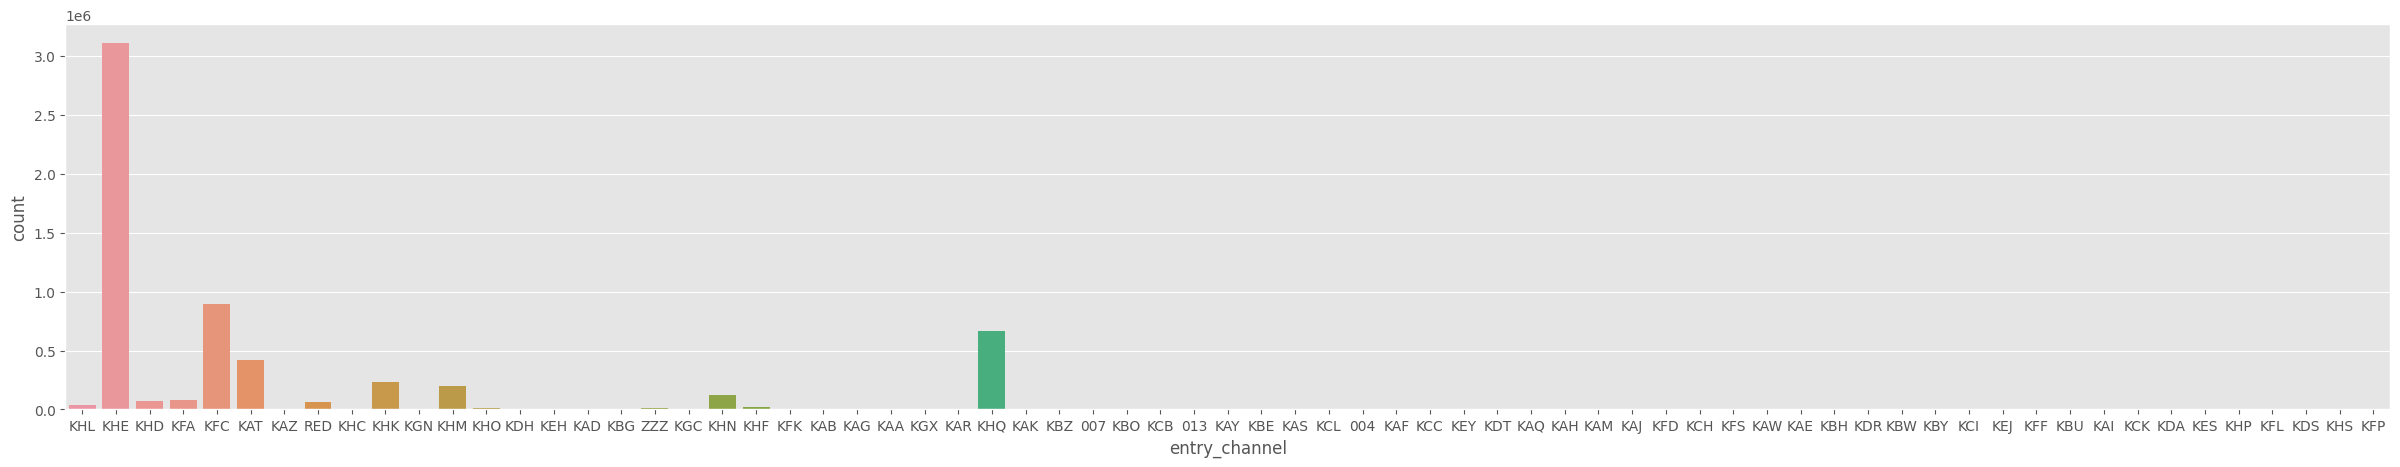

In [71]:
plt.figure(figsize=(30,5))
sns.countplot(
    data=df1,x='entry_channel'
)

####Tratamiento variables fecha

In [72]:
df1['entry_date']

customer_ID
1375586   2018-01-01
1050611   2015-08-01
1050612   2015-08-01
1050613   2015-08-01
1050614   2015-08-01
             ...    
1166765   2016-08-01
1166764   2016-08-01
1166763   2016-08-01
1166789   2016-08-01
1550586   2019-05-01
Name: entry_date, Length: 5962924, dtype: datetime64[ns]

In [ ]:
#la variable original solo contenía año y mes, añado cuarto por si fuera interesante

In [73]:
df1['entry_year']=customer_commercial_activity_1['entry_date'].dt.year
df1['entry_month']=customer_commercial_activity_1['entry_date'].dt.month
df1['entry_quarter']=customer_commercial_activity_1['entry_date'].dt.quarter


In [79]:
df1.head()

,partition_ID,entry_channel,active_customer,segment,entry_year,entry_month,entry_quarter
customer_ID,,,,,,,
1375586,2018-01-01,KHL,1.0,02 - PARTICULARES,2017,11,4
1050611,2018-01-01,KHE,0.0,03 - UNIVERSITARIO,2015,11,4
1050612,2018-01-01,KHE,0.0,03 - UNIVERSITARIO,2015,11,4
1050613,2018-01-01,KHD,0.0,03 - UNIVERSITARIO,2015,11,4
1050614,2018-01-01,KHE,1.0,03 - UNIVERSITARIO,2015,11,4


In [ ]:
df1.drop('entry_date',axis=1,inplace=True)

In [80]:
df1.head()

,partition_ID,entry_channel,active_customer,segment,entry_year,entry_month,entry_quarter
customer_ID,,,,,,,
1375586,2018-01-01,KHL,1.0,02 - PARTICULARES,2017,11,4
1050611,2018-01-01,KHE,0.0,03 - UNIVERSITARIO,2015,11,4
1050612,2018-01-01,KHE,0.0,03 - UNIVERSITARIO,2015,11,4
1050613,2018-01-01,KHD,0.0,03 - UNIVERSITARIO,2015,11,4
1050614,2018-01-01,KHE,1.0,03 - UNIVERSITARIO,2015,11,4


In [81]:
df1['partition_ID']

customer_ID
1375586   2018-01-01
1050611   2018-01-01
1050612   2018-01-01
1050613   2018-01-01
1050614   2018-01-01
             ...    
1166765   2019-05-01
1166764   2019-05-01
1166763   2019-05-01
1166789   2019-05-01
1550586   2019-05-01
Name: partition_ID, Length: 5962924, dtype: datetime64[ns]

In [82]:
df1['partition_year']=customer_commercial_activity_1['partition_ID'].dt.year
df1['partition_month']=customer_commercial_activity_1['partition_ID'].dt.month


In [83]:
df1.head()

,partition_ID,entry_channel,active_customer,segment,entry_year,entry_month,entry_quarter,partition_year,partition_month
customer_ID,,,,,,,,,
1375586,2018-01-01,KHL,1.0,02 - PARTICULARES,2017,11,4,2018,6
1050611,2018-01-01,KHE,0.0,03 - UNIVERSITARIO,2015,11,4,2018,5
1050612,2018-01-01,KHE,0.0,03 - UNIVERSITARIO,2015,11,4,2018,5
1050613,2018-01-01,KHD,0.0,03 - UNIVERSITARIO,2015,11,4,2018,5
1050614,2018-01-01,KHE,1.0,03 - UNIVERSITARIO,2015,11,4,2018,5


In [84]:
df1.drop('partition_ID',axis=1,inplace=True)

In [85]:
df1.head()

,entry_channel,active_customer,segment,entry_year,entry_month,entry_quarter,partition_year,partition_month
customer_ID,,,,,,,,
1375586,KHL,1.0,02 - PARTICULARES,2017,11,4,2018,6
1050611,KHE,0.0,03 - UNIVERSITARIO,2015,11,4,2018,5
1050612,KHE,0.0,03 - UNIVERSITARIO,2015,11,4,2018,5
1050613,KHD,0.0,03 - UNIVERSITARIO,2015,11,4,2018,5
1050614,KHE,1.0,03 - UNIVERSITARIO,2015,11,4,2018,5


####OHE para 'entry_channel' y 'segment'

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 1375586 to 1550586
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   entry_channel    object 
 1   active_customer  float64
 2   segment          object 
 3   entry_year       int64  
 4   entry_month      int64  
 5   entry_quarter    int64  
 6   partition_year   int64  
 7   partition_month  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 409.4+ MB


In [87]:
df1.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
entry_channel,5962924,69,KHE,3113987
segment,5962924,4,03 - UNIVERSITARIO,3978180


In [88]:
dummy_dataset=pd.get_dummies(df1['entry_channel'],prefix='entry_channel')


In [89]:
df1=pd.concat([df1,dummy_dataset],axis=1)

In [90]:
df1.drop('entry_channel',axis=1,inplace=True)

In [91]:
dummy_dataset_2=pd.get_dummies(df1['segment'],prefix='segment')

In [92]:
df1=pd.concat([df1,dummy_dataset_2],axis=1)

In [93]:
df1.drop('segment',axis=1,inplace=True)

In [94]:
df1.head()

,active_customer,entry_year,entry_month,entry_quarter,partition_year,partition_month,entry_channel_004,entry_channel_007,entry_channel_013,entry_channel_KAA,...,entry_channel_KHO,entry_channel_KHP,entry_channel_KHQ,entry_channel_KHS,entry_channel_RED,entry_channel_ZZZ,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,segment_04 - NO SEGMENT
customer_ID,,,,,,,,,,,,,,,,,,,,,
1375586,1.0,2017,11,4,2018,6,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1050611,0.0,2015,11,4,2018,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1050612,0.0,2015,11,4,2018,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1050613,0.0,2015,11,4,2018,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1050614,1.0,2015,11,4,2018,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [95]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 1375586 to 1550586
Data columns (total 79 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   active_customer             float64
 1   entry_year                  int64  
 2   entry_month                 int64  
 3   entry_quarter               int64  
 4   partition_year              int64  
 5   partition_month             int64  
 6   entry_channel_004           uint8  
 7   entry_channel_007           uint8  
 8   entry_channel_013           uint8  
 9   entry_channel_KAA           uint8  
 10  entry_channel_KAB           uint8  
 11  entry_channel_KAD           uint8  
 12  entry_channel_KAE           uint8  
 13  entry_channel_KAF           uint8  
 14  entry_channel_KAG           uint8  
 15  entry_channel_KAH           uint8  
 16  entry_channel_KAI           uint8  
 17  entry_channel_KAJ           uint8  
 18  entry_channel_KAK           uint8  
 19  entry_channel_K

### Customer Products

- pk_cid =	Identificador de cliente
- pk_partition =	Identificador de Partición. Mensualmente se ingesta en la tabla una partición con el estado de la base de clientes.
- credit_card =	Tenencia de tarjetas de crédito
- debit_card =	Tenencia de tarjetas de débito
- em_account_p =	Tenencia de Cuenta easyMoney+
- em_account_pp =	Tenencia de Cuenta easyMoney++
- em_acount =	Tenencia de Cuenta easyMoney
- emc_account =	Tenencia de Cuenta easyMoney Crypto
- funds =	Tenencia de Fondos de inversión
- loans =	Tenencia de Préstamos
- long_term_deposit =	Tenencia de Depósitos a largo plazo
- mortgage =	Tenencia de Mortgage
- payroll =	Tenencia de Domiciliaciones 
- payroll_account =	Tenencia de Cuenta bonificada por domiciliaciones
- pension_plan =	Tenencia de Plan de pensiones
- securities =	Tenencia de Valores
- short_term_deposit =	Tenencia de Short-term deposits

In [ ]:
customer_products_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   pk_cid              int64  
 2   pk_partition        object 
 3   short_term_deposit  int64  
 4   loans               int64  
 5   mortgage            int64  
 6   funds               int64  
 7   securities          int64  
 8   long_term_deposit   int64  
 9   em_account_pp       int64  
 10  credit_card         int64  
 11  payroll             float64
 12  pension_plan        float64
 13  payroll_account     int64  
 14  emc_account         int64  
 15  debit_card          int64  
 16  em_account_p        int64  
 17  em_acount           int64  
dtypes: float64(2), int64(15), object(1)
memory usage: 818.9+ MB


In [ ]:
customer_products_raw.head()

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,0,1375586,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1,1050611,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,2,1050612,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,3,1050613,2018-01,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,4,1050614,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [ ]:
customer_products_raw.describe(include = ['object'])

,pk_partition
count,5962924
unique,17
top,2019-05
freq,442995


In [ ]:
customer_products_raw.describe(exclude = ['object'])

,Unnamed: 0,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
count,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5962924.0,5.962924e+06,5.962863e+06,5.962863e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06
mean,7.155425e+06,1.234930e+06,2.581619e-03,7.848498e-05,5.433576e-05,3.370662e-03,3.711770e-03,1.688098e-02,0.0,1.188444e-02,3.451144e-02,3.652641e-02,5.524471e-02,5.483233e-02,9.441140e-02,5.701901e-06,7.348076e-01
std,3.920784e+06,1.623020e+05,5.074401e-02,8.858828e-03,7.371080e-03,5.795948e-02,6.081113e-02,1.288255e-01,0.0,1.083660e-01,1.825388e-01,1.875960e-01,2.284573e-01,2.276527e-01,2.924002e-01,2.387859e-03,4.414356e-01
min,0.000000e+00,1.589100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.240386e+06,1.112532e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.499346e+06,1.231097e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.020142e+07,1.352339e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.364731e+07,1.553689e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
customer_products_raw.isnull().sum()

Unnamed: 0             0
pk_cid                 0
pk_partition           0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll               61
pension_plan          61
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dtype: int64

In [ ]:
# ACCIONES CUSTOMER PRODUCTS

# Eliminar columna Unnamed
# Cambiar los identificadores (pk_cid) a variable categórica
# Cambiar tipo de columnas booleanas a boolean?
# Establecer primary key como index?
# Gestionar nulos: 
#     payroll                     
#     pension_plan
# Eliminar em_account_pp, no hay datos

# Cambiar tipo de payroll y pension_plan a int

### Análisis del target

In [ ]:
# Para el modelo de propensión a compra (supervisado > clasificación) trataremos de averiguar la propensión a compra de ciertos productos de cada cliente
# El target puede ser:
#  - em_acount = 4.381.602  (73,48%)
#  - pension_plan = 2.178.020 (36,53%) ** Target interesante por negocio
#  - debit_card = 562.968 (9,44%)
#  - payroll_account = 329.420 (5,52%)


# Analizando el revenue de cada producto:
#  - pension_plan = media >5200€ ** Target interesante por revenue
#  - loans = media > 2000€
#  - mortgage = media > 2000€ 
#
#
# El producto "pension_plan" resulta interesante ya que un 74% de la bbdd todavía no ha es cliente y es el que más beneficios genera a la compañía


TARGET = "pension_plan"

In [ ]:
for i in ['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities','long_term_deposit', 'em_account_pp','credit_card', 'payroll', 'pension_plan', 'payroll_account','emc_account', 'debit_card', 'em_account_p', 'em_acount']:
    suma_productos = customer_products_raw[i].sum()
    print (f"Suma de {i} = {suma_productos} . La media es de {round((suma_productos/customer_products_raw.shape[0])*100,2)}%")
    

Suma de short_term_deposit = 15394 . La media es de 0.26%
Suma de loans = 468 . La media es de 0.01%
Suma de mortgage = 324 . La media es de 0.01%
Suma de funds = 20099 . La media es de 0.34%
Suma de securities = 22133 . La media es de 0.37%
Suma de long_term_deposit = 100660 . La media es de 1.69%
Suma de em_account_pp = 0 . La media es de 0.0%
Suma de credit_card = 70866 . La media es de 1.19%
Suma de payroll = 205787.0 . La media es de 3.45%
Suma de pension_plan = 217802.0 . La media es de 3.65%
Suma de payroll_account = 329420 . La media es de 5.52%
Suma de emc_account = 326961 . La media es de 5.48%
Suma de debit_card = 562968 . La media es de 9.44%
Suma de em_account_p = 34 . La media es de 0.0%
Suma de em_acount = 4381602 . La media es de 73.48%


In [ ]:
sales_product_description = sales_raw.merge(product_description_raw, right_on = "pk_product_ID", left_on= "product_ID", how = "left")

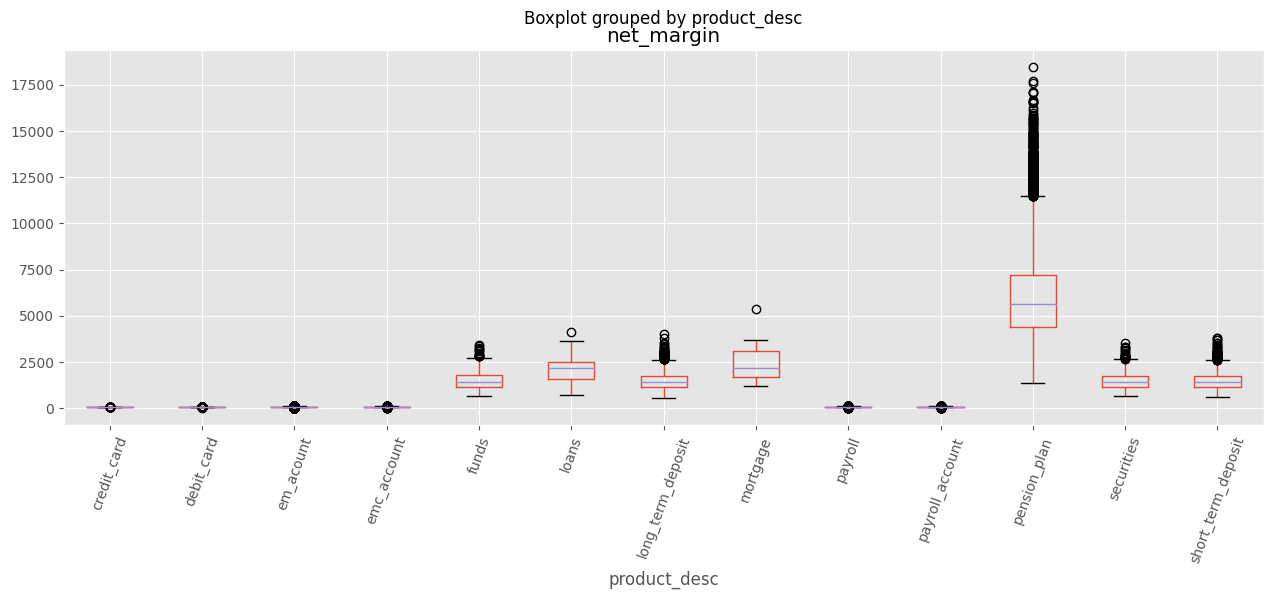

In [ ]:
sales_product_description.boxplot(column = "net_margin", by = "product_desc", figsize=(15,5))
plt.xticks(rotation=70);

### Distribución de las variables

#### Variables de fechas

In [ ]:
customer_commercial_activity_raw["entry_date"]

0          2018-01
1          2015-08
2          2015-08
3          2015-08
4          2015-08
            ...   
5962919    2016-08
5962920    2016-08
5962921    2016-08
5962922    2016-08
5962923    2019-05
Name: entry_date, Length: 5962924, dtype: object

In [ ]:
sales_raw["month_sale"]

0         2018-05-01
1         2018-06-01
2         2018-02-01
3         2018-02-01
4         2018-02-01
             ...    
240768    2019-05-01
240769    2019-05-01
240770    2019-05-01
240771    2019-05-01
240772    2019-05-01
Name: month_sale, Length: 240773, dtype: object

#### Variables numéricas

In [ ]:
sales_raw["product_ID"]
sales_raw["net_margin"]

0          952.9
1         1625.2
2         1279.7
3         1511.9
4         1680.3
           ...  
240768      56.7
240769      66.5
240770      73.0
240771      82.3
240772      84.4
Name: net_margin, Length: 240773, dtype: float64

#### Variables categóricas

In [ ]:
customer_commercial_activity_raw["entry_channel"]
customer_commercial_activity_raw["segment"]
customer_commercial_activity_raw["active_customer"]

0          1.0
1          0.0
2          0.0
3          0.0
4          1.0
          ... 
5962919    0.0
5962920    0.0
5962921    1.0
5962922    0.0
5962923    1.0
Name: active_customer, Length: 5962924, dtype: float64

In [ ]:
customer_sociodemographics_raw["deceased"]	
customer_sociodemographics_raw["gender"]	
customer_sociodemographics_raw["region_code"]	
customer_sociodemographics_raw["salary"]	
customer_sociodemographics_raw["country_id"]	
customer_sociodemographics_raw["age"]	

0          35
1          23
2          23
3          22
4          23
           ..
5962919    22
5962920    23
5962921    47
5962922    22
5962923    37
Name: age, Length: 5962924, dtype: int64

In [ ]:
product_description_raw["product_desc"]	
product_description_raw["family_product"]	

0          account
1     payment_card
2     pension_plan
3          account
4          account
5          account
6     payment_card
7       investment
8       investment
9       investment
10      investment
11            loan
12            loan
Name: family_product, dtype: object